In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
save_path = "plots"
output_path = "outputs"
if not os.path.exists(save_path):
    os.mkdir(save_path)

In [11]:
store = {
    "ml": {
        "svr": "svr",
        "rf": "rf",
        "lgb": "lgb",
    },
    "nn": {
        "mlp": "mlp_256_2_tanh",
        "lstm": "lstm_75_2",
        "gru": "gru_86_2",
    },
    "rl": {
        "sac": "sac",
        "ddpg": "ddpg",
        "td3": "td3",
    },
    "vote": {
        "V1": "vote_lgb_rf_svr",
        "V2": "vote_mlp_lstm_gru",
        "V3": "vote_sac_ddpg_td3",
    },
    "stack": {
        "S1": "stack_lgb_rf_svr-slr",
        "S2": "stack_mlp_lstm_gru-slr",
        "S3": "stack_sac_ddpg_td3-slr",
    },
}

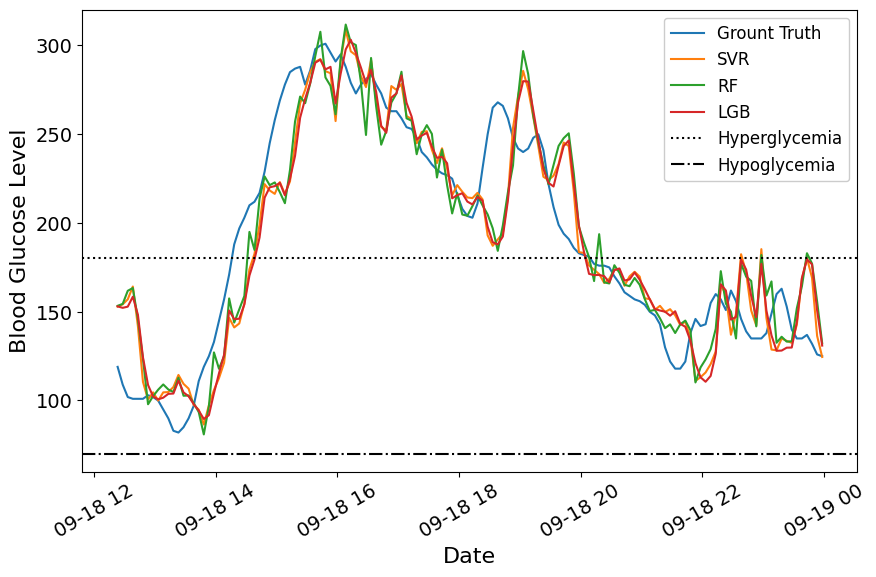

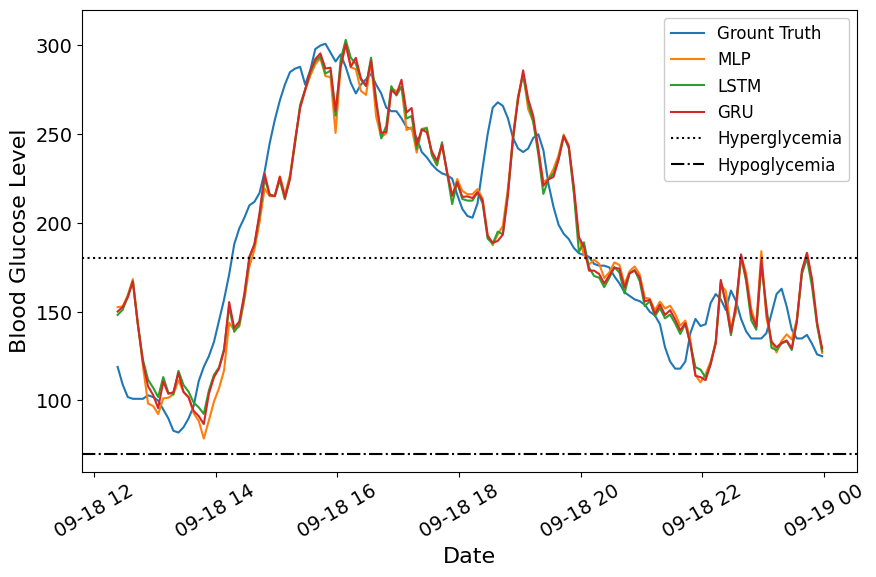

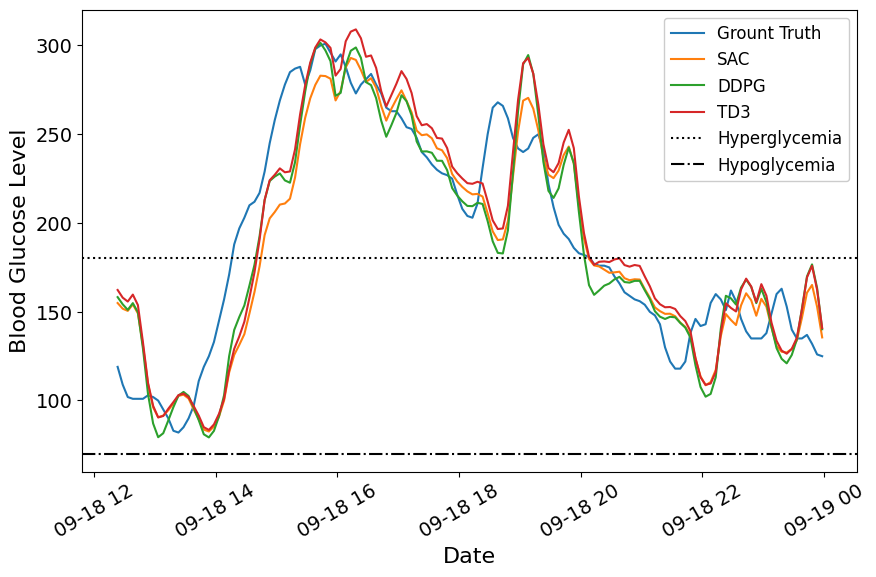

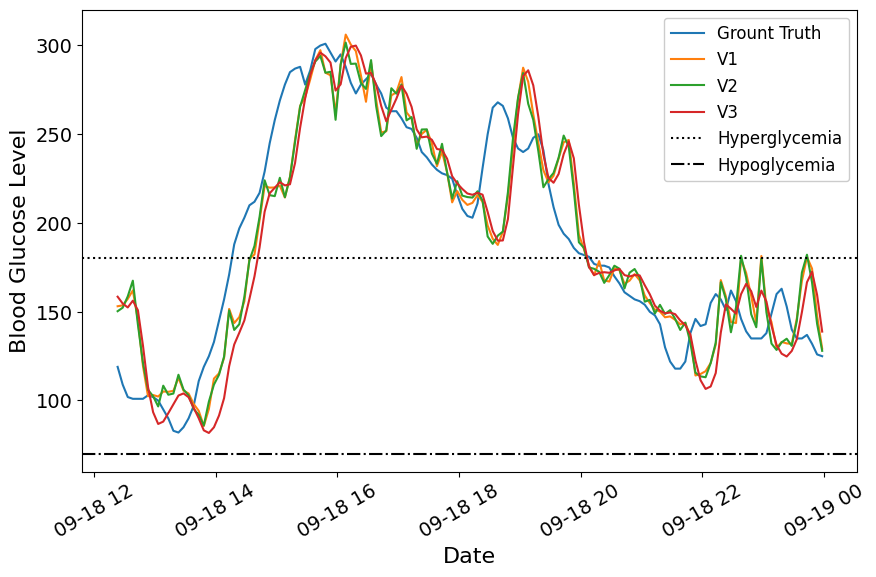

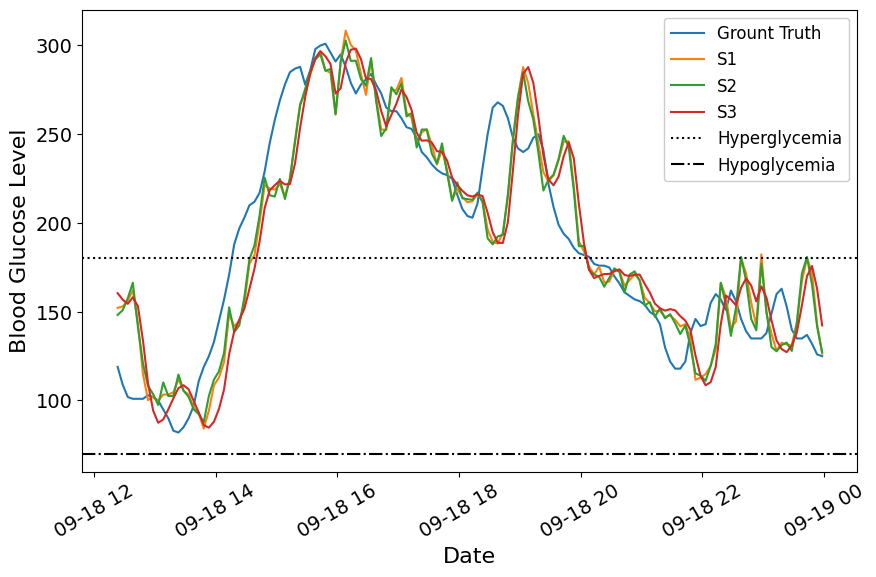

In [12]:
for (plt_name, outputs) in store.items():
    fig = plt.figure(figsize=(10, 6))

    for i, (key, items) in enumerate(outputs.items()):
        df = pd.read_csv(f"{output_path}/{items}_output.csv")
        df["date"] = pd.to_datetime(df["date"])
        
        subject = df["subject_id"].value_counts().index[0]
        a = df[df["subject_id"] == subject]
        most_day = a["date"].dt.date.value_counts().index[0]
        b = a[a["date"].dt.date == most_day].sort_values("date")
        b = b.iloc[int(len(b) / 2):]
        
        if i == 0:
            plt.plot(b["date"], b["target"], label="Grount Truth")
        plt.plot(b["date"], b["y_pred"], label=key.upper())
        
    plt.axhline(y=180, color = 'black', linestyle = ':', label="Hyperglycemia")
    plt.axhline(y=70, color = 'black', linestyle = '-.', label="Hypoglycemia")
    plt.xticks(rotation=30, fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("Blood Glucose Level", fontsize=16)
    plt.gca().set_ylim(60, 320)
    plt.legend(fontsize=12, loc="upper right", framealpha=1.0)
    plt.savefig(f"{plt_name}_plot.pdf", format="pdf")
    plt.show()